<a id = 'Section 0'></a>
***
## HW2

#### Use this notebook to solve and report you solution to homework 1. This homwork has the following problems: 

- <a href = '#Section 1'> Problem 1  </a>
- <a href = '#Section 2'> Problem 2  </a>
- <a href = '#Section 3'> Problem 3  </a>

### Submission guidelines:
- No report is required. 
- The results should be included in the notebook only. 
- Use the given code cell(s) to write your code for each problem.Don't add new cells 
- Use the given markup cell(s) to write your comments and answers, if required. 
- Put the notebook and all the images you use in <font color=red>**one compressed file**</font> and submit it through the assignment on Teams.
- Name the submitted file as <font color=red>**ID_FirstName_LastName**</font>. For example: 2100111_IYAD_JAFAR

***
## Import Packages

In [77]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# import other packages if you need any
%matplotlib inline

<a id='Section 1'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 1. Image filtering
***
The image f16noisy.jpg is corrupted with some type of noise. Try to reduce this noise by using:
- 3x3 Median filter
- 3x3 Gaussian filter
- 3x3 Box filter
- 3x3 Maximum filter
- 3x3 Minimum filter

For each ouput image, calculate the peak signal-to-noise ratio (PSNR) between the output image and the noise free version of image f16.jpg. 

You need to define a function for the minumum filter and another one for the maximum filter.

In [78]:
# minimum filter function 
def minFilt(im, maskSize):
    shape = cv2.MORPH_RECT
    kernel = cv2.getStructuringElement(shape, maskSize)
    bdr = int((maskSize[0]-1)/2)
    img = cv2.copyMakeBorder(im, bdr, bdr, bdr, bdr,cv2.BORDER_REPLICATE)
    row = img.shape[0] - maskSize[0] + 1
    col = img.shape[1] - maskSize[0] + 1
    imgResult = np.zeros(shape=(row, col))
    # Applies the minimum filter with kernel NxN
    #imgResult = cv2.erode(img, kernel)
    for i in range(row):
        for j in range(col):
            current = img[i:i+maskSize[0], j:j+maskSize[0]]
            multiplication = np.abs(np.min(np.min(current * kernel)))
            imgResult[i, j] = multiplication.round(0).astype(np.uint8)

    return imgResult

# maximum filter function    
def maxFilt(im,maskSize):
    shape = cv2.MORPH_RECT
    bdr = int((maskSize[0]-1)/2)
    img = cv2.copyMakeBorder(im, bdr, bdr, bdr, bdr,cv2.BORDER_REPLICATE)
    row = img.shape[0] - maskSize[0] + 1
    col = img.shape[1] - maskSize[0] + 1
    imgResult = np.zeros(shape=(row, col))
    kernel = cv2.getStructuringElement(shape, maskSize)
    # Applies the maximum filter with kernel NxN
    #imgResult = cv2.dilate(img, kernel)
    for i in range(row):
        for j in range(col):
            current = img[i:i+maskSize[0], j:j+maskSize[0]]
            multiplication = np.abs(np.max(np.max(current * kernel)))
            imgResult[i, j] = multiplication.round(0).astype(np.uint8)

    return imgResult



In [79]:
# peform the required filtering operations 
img=cv2.imread('f16noisy.jpg',0)
n = 3
maskSize = (n,n)

filters=['Median' , 'Gaussian', 'Box', 'Maximum', 'Minimum']
result=dict()
result['Median']= cv2.medianBlur(img,ksize = n)
result['Gaussian']= cv2.GaussianBlur(img,ksize=maskSize,sigmaX=0,sigmaY=0)
result['Box']= cv2.blur(img,ksize=maskSize,borderType=cv2.BORDER_REPLICATE)
result['Minimum']= minFilt(img,maskSize)
result['Maximum']= maxFilt(img,maskSize)


In [80]:
# calculate PSNR for each output image
result['Original']=cv2.imread('f16.jpg',0)
PSNR=dict()
for key in result.keys():
    PSNR[key]= np.round(cv2.PSNR(result['Original'],result[key].astype(result['Original'].dtype)),2)


    


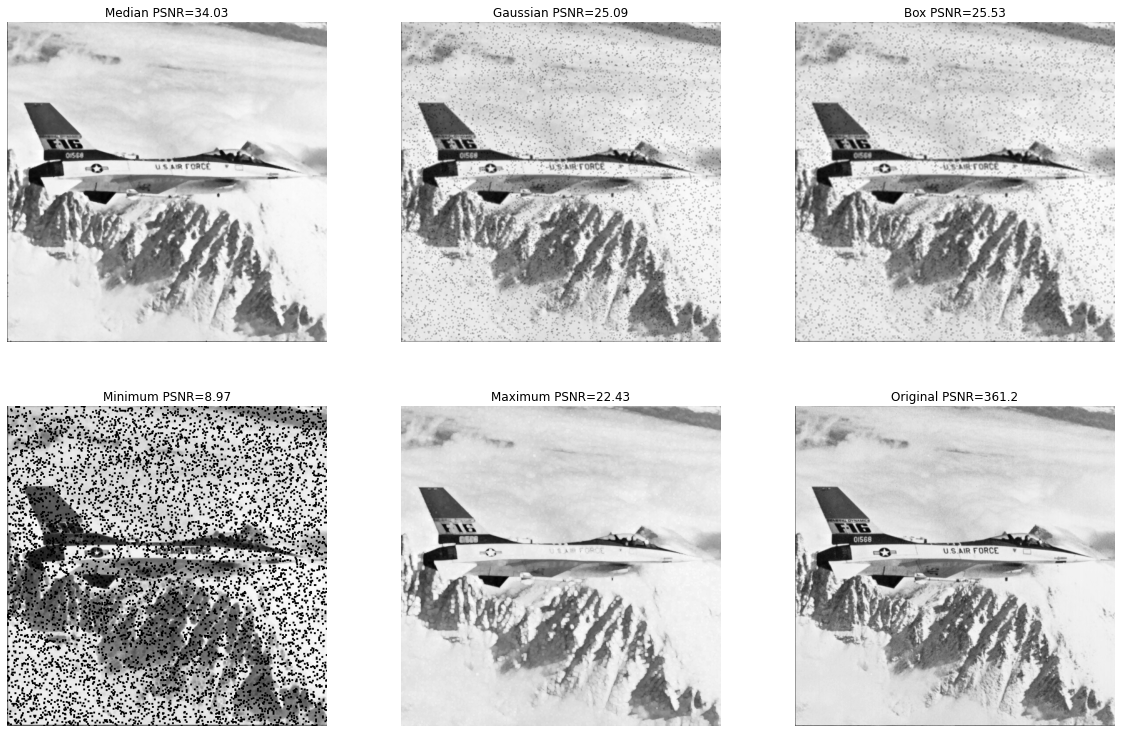

In [81]:
# display the original and filtered images properly. Set the title of each image to the PSNR value. 

plt.figure(figsize=(20,20))
for (i,key) in zip(range(6),result.keys()):
    plt.subplot(3,3,i+1)
    plt.imshow(result[key],cmap='gray')
    plt.axis('off')
    plt.title(key + " "+ 'PSNR='+str(PSNR[key]))


### Discuss your results
Peak signal-to-noise ratio (PSNR) is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. 

PSNR is used to estimate the efficiency of filters. The larger the value of PSNR, the more efficient is a corresponding filter method.

The Worst result is for Minimum>Maximum>Gausian>Box

### Median filter: 
is good for both salt and pepper noise because they occur at random pixels. while minimum and maximum filters will affect the other objects as well so they are not for general way to remove salt and peppers.

### Maximum filter 
The central pixel will be replaced by the brightest pixel in the vicinity (filter structural element). this makes Perfect for removing pepper noise and ensuring that the key features are relatively sharp.

### Minimum filter 
The central pixel will be replaced by the darkest pixel in the 3 X 3 neighborhood it perfect for removing salt noise (white dots) and ensuring that the key features are relatively sharp.




<a id='Section 2'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 2. 
***
Given the shapes.jpg image included in the compressed file, it is required to process it to produce a single new color image such that: 

- The background of the image is gray
- The largest red circle is filled with red color and longest red line is colored with black. 
- The largest blue circle is filled with blue and the longest blue line is colored with yellow. 
- The largest green circle is filled with green and the longest green line is colored with magenta.

Also, report the area and center of each of the circles and the length of lines your detected previously. 
Explain your solution in details.

In [82]:
# your solution
shapes_img=cv2.imread('shapes.jpg',1)
shapes_img=cv2.cvtColor(shapes_img,cv2.COLOR_BGR2RGB)

(r,g,b)=cv2.split(shapes_img)
shapes_img_m= minFilt(r, (3,3))

def clean_channel(channel):

    T = 128
    r_thre=channel.copy()
    r_thre=cv2.medianBlur(r_thre,ksize = 7)

    r_thre[r_thre<T] = 0 
    r_thre[r_thre>=T] = 255 

    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    SE1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    im3 = cv2.morphologyEx(r_thre,cv2.MORPH_OPEN,SE)
    im4 = cv2.morphologyEx(im3,cv2.MORPH_CLOSE,SE)
    im4 =cv2.dilate(im4,SE)
    return im4

import math
lines=dict()
circles=dict()
lines_length=dict()
circles_area=dict()
circles_center=dict()
channels={'red':r,'green':g,'blue':b}
for channel in channels.keys():
    channels[channel]=clean_channel(channels[channel])
lineThickness = 2
gen_image=np.ones(shape=shapes_img.shape,dtype=np.uint8)
gen_image[:]=(128,128,128)

circles['red'] = np.uint16(np.around(cv2.HoughCircles(channels['red'],cv2.HOUGH_GRADIENT,1,500,
                            param1=50,param2=30,minRadius=200,maxRadius=550)))
lines['red'] = cv2.HoughLinesP(channels['red'], 1, np.pi / 180, 1950, None, 2100, 50)

circles['green'] = cv2.HoughCircles(channels['green'],cv2.HOUGH_GRADIENT,1,1700,
                            param1=100,param2=20,minRadius=200,maxRadius=350)
lines['green'] = cv2.HoughLinesP(channels['green'], 1, np.pi / 180, 1800, None, 1400, 50)

circles['blue'] = cv2.HoughCircles(channels['blue'],cv2.HOUGH_GRADIENT,1,130,
                            param1=20,param2=20,minRadius=190,maxRadius=300)
lines['blue'] = cv2.HoughLinesP(channels['blue'], 1, 1*np.pi / 180, 670, 10, 280, 85)
colors={'red':(0,0,0),'green':(255,255,0),'blue':(255,0,255)}
print(lines['blue'])
for key in circles.keys():
    if circles[key] is not None:
            for i in range(0, len(circles[key][0])):
                (c2,c1) = circles[key][0][i][0].astype(int),circles[key][0][i][1].astype(int)
                center=(c2,c1)
                radius = circles[key][0][i][2].astype(int)
                circles_area
                cv2.circle(gen_image, center, radius, colors[key], -1)
                circles_area[key]=np.pi*radius**2
                circles_center[key]=radius
    if lines[key] is not None:
            lengths=[]
            for i in range(0, len(lines[key])):
                l = lines[key][i][0]
                lengths.append(np.sqrt((l[2]-l[0])**2+(l[3]-l[1])**2))
            l=lines[key][np.argmax(lengths)][0]
            cv2.line(gen_image, (l[0], l[1]), (l[2], l[3]), colors[key], 1, cv2.LINE_AA)
            lines_length[key]=np.sqrt((l[2]-l[0])**2+(l[3]-l[1])**2)


[[[1245  210 1820  210]]

 [[1243  209 1820  209]]

 [[1451 1044 1918  577]]

 [[1241  208 1818  208]]

 [[1454 1043 1919  578]]

 [[1240  207 1816  207]]

 [[1247  211 1804  211]]

 [[1240  206 1814  206]]]


circles area

	 red 210741.18 

	 green 280861.52 

	 blue 118236.98 

circles center

	 red 259 

	 green 299 

	 blue 194 

lines length

	 red 2120.0 

	 green 1930.0 

	 blue 660.44 



(-0.5, 2289.5, 1055.5, -0.5)

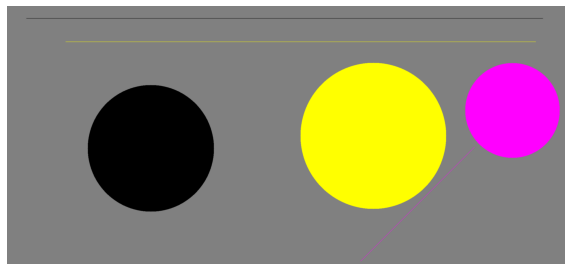

In [86]:
# display final image
print('circles area\n')
for key in circles_area.keys():
    print('\t',key,circles_area[key].round(2),"\n")
print('circles center\n')
for key in circles_center.keys():
    print('\t',key,circles_center[key].round(2),"\n")
   

print('lines length\n')
for key in lines_length:
    print('\t',key,lines_length[key].round(2),"\n")

plt.figure(figsize=(10,15))
plt.imshow(gen_image)
plt.axis('off')


### Explanation

circles area

	 red 210741.18 

	 green 280861.52 

	 blue 118236.98 

circles center

	 red 259 

	 green 299 

	 blue 194 

lines length

	 red 2120.0 

	 green 1930.0 

	 blue 660.44 

### We splite the image into 3 main channels (r,b,g) then apply the following steps on each channel:
### First step: 
is to remove the noise from image make it smoother here we use mdianblure and then use global thresholding to remove the noise and make the channel image as binary image.
### Second step: 
is to try to solve intrusion and extrusion and strengthen the lines and circles borders by using morphological oberations opening and closing followed by dilation.
### Third step:
is trying to find the largest circles and longest lines in each channel: red, green and blue by using hough transformation 
and tweeking the parameters to return the desires output.
### Fourth step:
for each circle and line found in each channel draw the line with the corresponding color, and calculate the area and length.



<a id='Section 3'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 3. 
***
In a certain imaging application, it is required to detect the sine wave in a 500x500 binary edge image. The sine wave is given by $ y= |a sin(\omega x)| $. Write an algorithm to detect the sine in a binary edge image. Test you algorithm on the test1.jpg, test2.jpg and test3.jpg images. The output of your algorithm should superimpose the sine wave on the original image with red color. Assume that $a \in [10,500]$ and $\omega \in [0.01,0.09]$.

Explain your algorithm clearly in the dedicate cell.

In [84]:
# Code 
import cv2
import numpy as np
import matplotlib.pyplot as plt
def find_sin_param(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    sin_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    sin_img=cv2.medianBlur(sin_img,ksize=5)
    T=254
    sin_thresh = sin_img.copy()
    sin_thresh[np.where(sin_img>T)] = 255 
    sin_thresh[np.where(sin_img<=T)] = 0 

    SE=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    im4 = cv2.dilate(sin_thresh,SE)
    SE=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    cleared_img = cv2.erode(im4,SE)


    X=np.where(cleared_img>0)[1]
    y=np.where(cleared_img>0)[0]

    w=np.arange(0.01,.09,.0002)
    a=np.arange(10,500)

    accum=np.zeros(shape=(w.shape[0],a.shape[0]))
    for i in  np.arange(X.shape[0]):
        for j in np.arange(w.shape[0]):
            aj=y[i]/np.abs(np.sin(w[j]*X[i]))
            accum[j,np.where(a==np.ceil(aj))]+=1
           
    from numpy import unravel_index
    w_ex=w[unravel_index(accum.argmax(), accum.shape)[0]]
    a_ex=a[unravel_index(accum.argmax(), accum.shape)[1]]
    plt.imshow(cleared_img)
    return (w_ex,a_ex)


C:\Users\user\AppData\Local\Temp\ipykernel_25072\342787254.py:29: RuntimeWarning: invalid value encountered in true_divide
  aj=y[i]/np.abs(np.sin(w[j]*X[i]))
C:\Users\user\AppData\Local\Temp\ipykernel_25072\342787254.py:29: RuntimeWarning: divide by zero encountered in true_divide
  aj=y[i]/np.abs(np.sin(w[j]*X[i]))


Text(0.5, 1.0, 'test3')

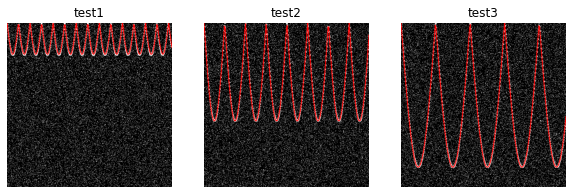

In [85]:
# Results
images=dict()
plt.subplots(1,3,figsize=(10, 20))

for i in range(1,4,1):
    images[i]=cv2.imread(f'test{i}.jpg',1)
    sigma,mag=find_sin_param(images[i])
    X_ex=range(0,501)
    y_ex=list()
    for pt in range(0,len(X_ex)-2):
        y_ex.append(mag*np.abs(np.sin(2*sigma*X_ex[pt])))
        y_ex.append(mag*np.abs(np.sin(2*sigma*X_ex[pt+1])))
        cv2.line(images[i] ,(int(X_ex[pt]),int(y_ex[pt])),(int(X_ex[pt+1]),int(y_ex[pt+1])),(255, 0, 0),2)

plt.subplot(1,3,1)
plt.imshow(images[1])
plt.axis('off')
plt.title(f'test{1}') 

plt.subplot(1,3,2)
plt.imshow(images[2])
plt.axis('off')
plt.title(f'test{2}') 

plt.subplot(1,3,3)
plt.imshow(images[3])
plt.axis('off')
plt.title(f'test{3}') 



### Explanation
(Write here)
We follow the following steps to detect , implement and draw the sine waves in the 3 images:

### Step1: Remove Noise:
Read each image as colored image then convert the image to gray scale to easily detect the points of sinosoidal then try to eleminate the salt noise in images by using 3 ways median blur, then thresholding(binary image), and at the end using dilation followed by erosion with different Structure elements size,this result a clear image with noise free, then detect X and y (each represent a point on sinosoidal curve) by returning the locations of pixels in the image that is larger than 0 (not background). 
### Step2: Detect Magnitude and Sigma:
Using haugh transform implementation try to find the parameters of the sine wave by : 
1. pick a finit set of values for a and w.
2. create and (w.shape)X(a.shape) accumelator array initialized with zeros.
3.for every (x,y) point, substitude  in the following equation (aj=y[i]/np.abs(np.sin(w[j]*X[i])))to find a for all w values
4. increment the corresponding cell of accum(w,a) by 1 
5. pick the (w,a) with the highest count (that has the index of the accum.max())

### Step3: Detect and Draw the Sine Wave: 
Substitude the parameters found in the sine equation(mag*np.abs(np.sin(2*sigma*X_ex[pt+1]))) and try to find the exact y for each x in range of (0,500)
plot the sine wave of (x,y) values on each image.